<a href="https://colab.research.google.com/github/NithyaConnect/ds-phython/blob/main/_censes_principal_component_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in the data and perform basic exploratory analysis

In [ ]:
path="/content/drive/MyDrive/clusterring glearn/census.xlsx" 
df_test=pd.read_excel(path)
df=df_test.copy()

In [ ]:
df.drop(['State','Area Name','State Code','Dist.Code'], axis=1,inplace=True) 

In [ ]:
df

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,3333,8154,11781,1146,1203,21,30,0,0,6916,...,32,47,0,0,0,0,0,0,32,47
636,10612,12346,21691,1544,1533,2234,4155,0,0,10292,...,155,337,3,14,38,130,4,23,110,170
637,1275,1549,2630,227,225,0,0,1012,1750,1187,...,104,134,9,4,2,6,17,47,76,77
638,3762,5200,8012,723,664,0,0,28,50,4206,...,136,172,24,44,11,21,1,4,100,103


In [ ]:
def impute_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df:     
  lr,ur=impute_outlier(df[column])
  df[column]=np.where(df[column]>ur,ur,df[column])
  df[column]=np.where(df[column]<lr,lr,df[column])

<ipython-input-134-9f5dbf33dd96>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1))


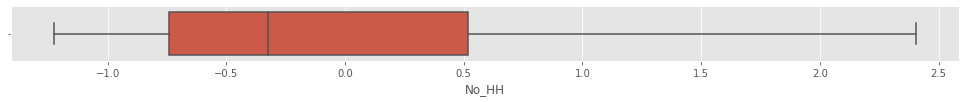

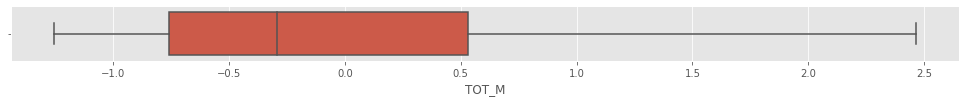

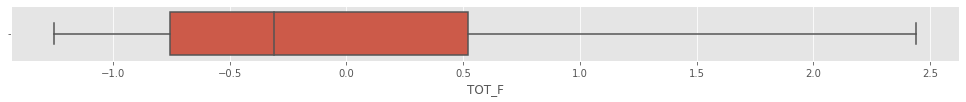

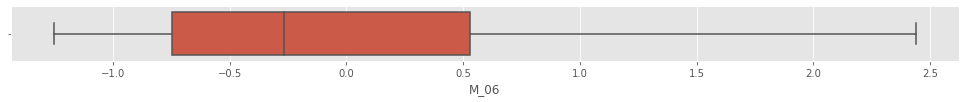

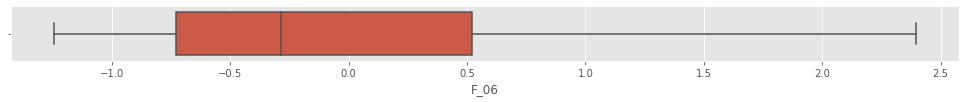

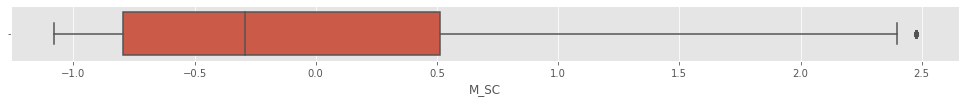

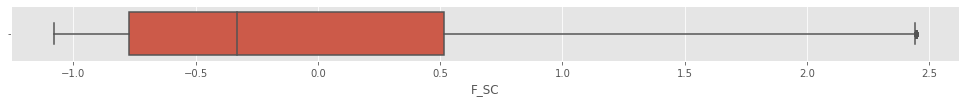

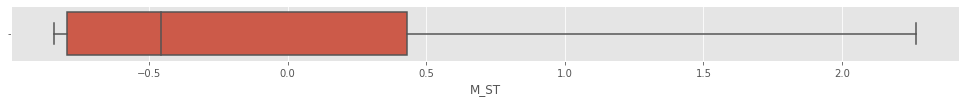

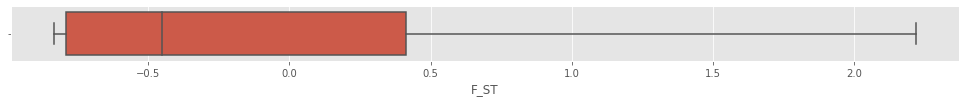

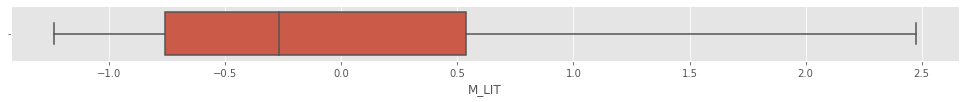

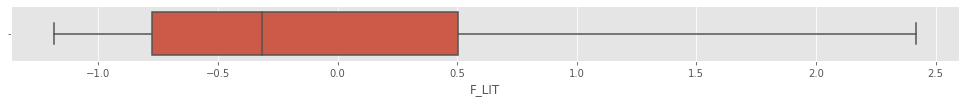

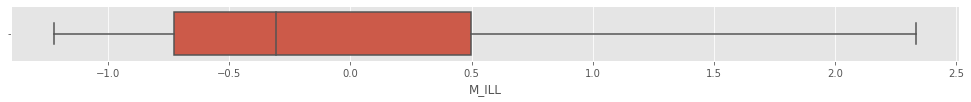

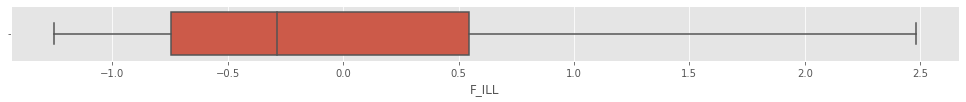

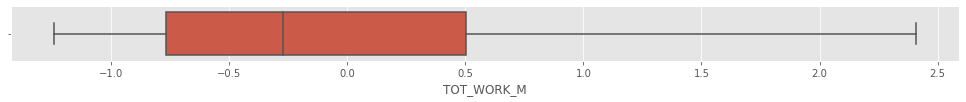

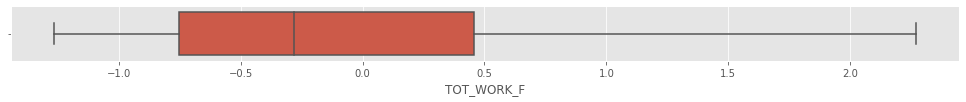

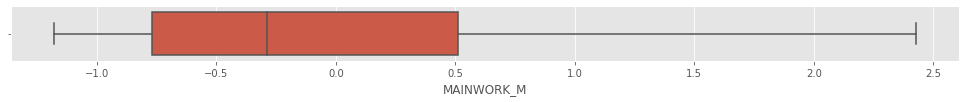

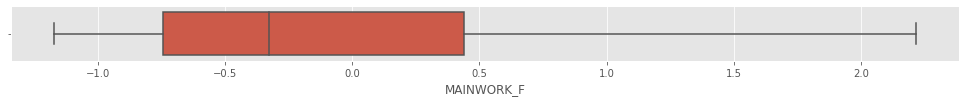

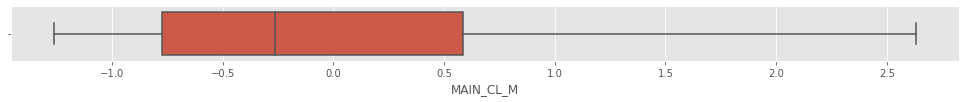

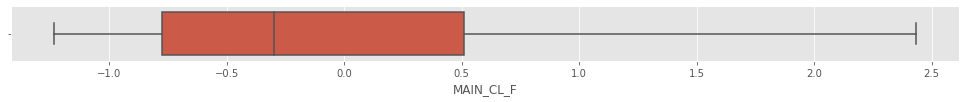

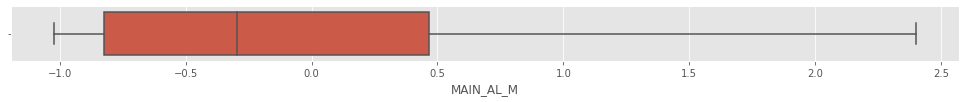

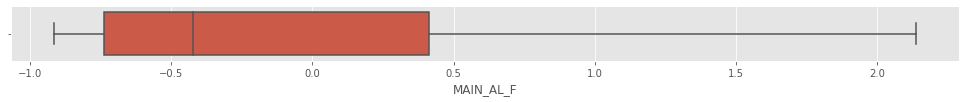

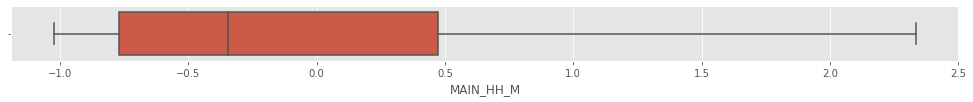

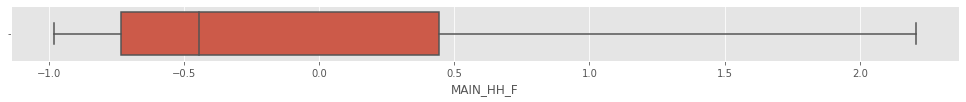

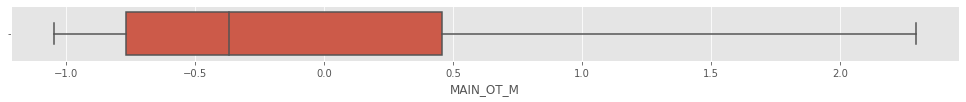

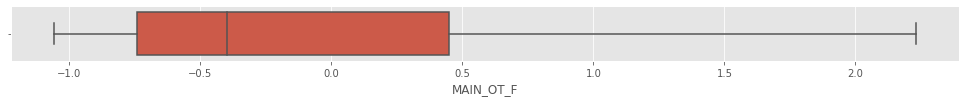

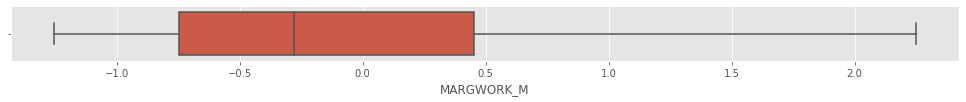

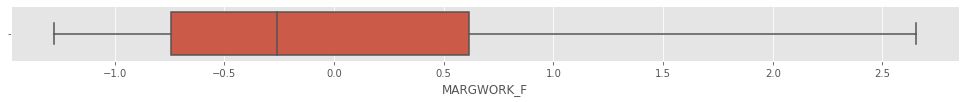

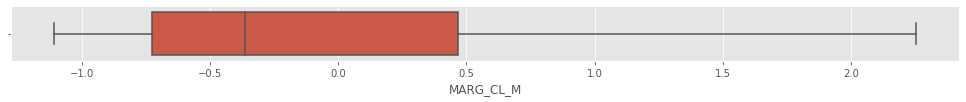

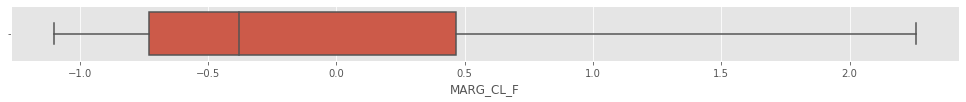

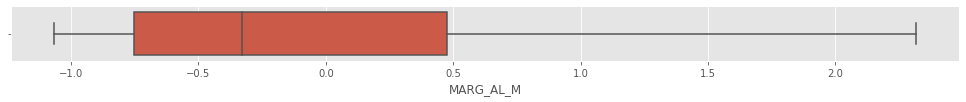

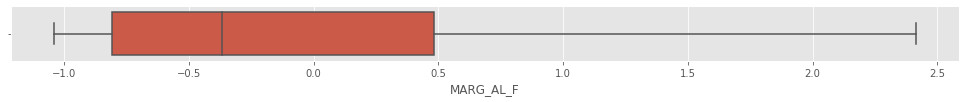

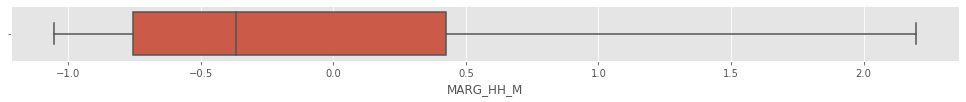

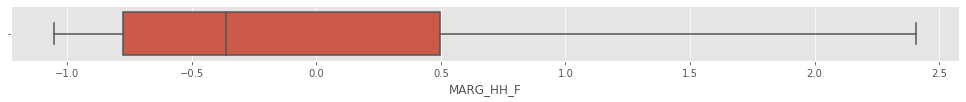

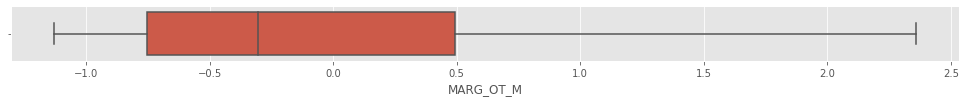

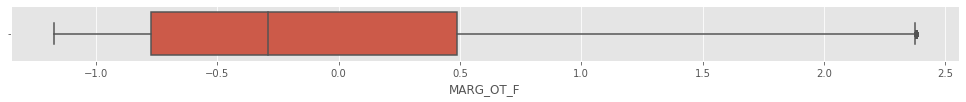

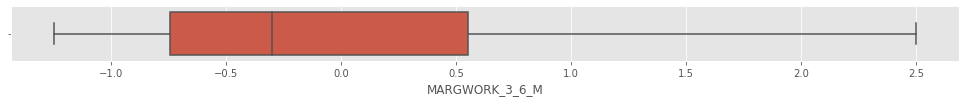

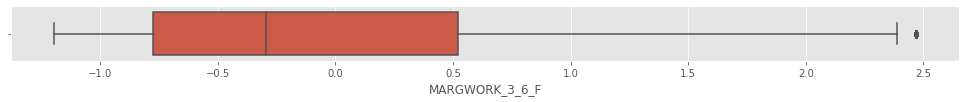

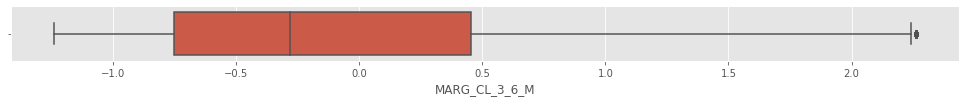

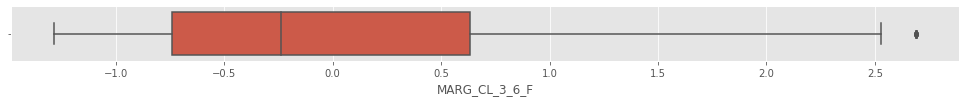

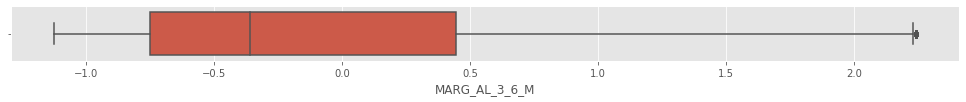

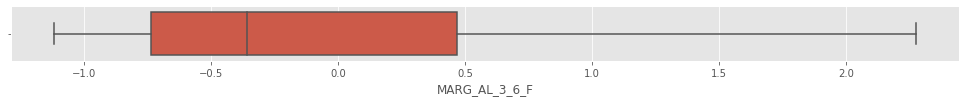

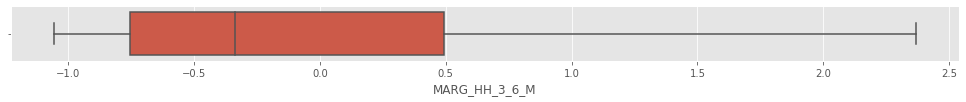

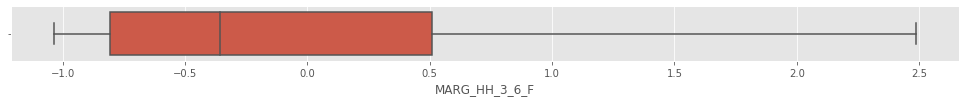

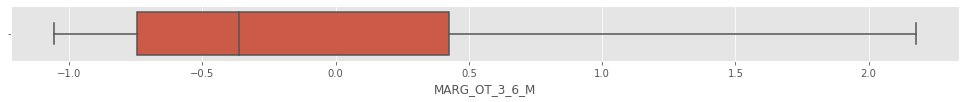

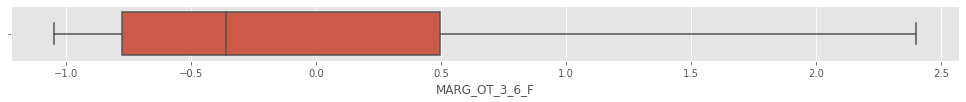

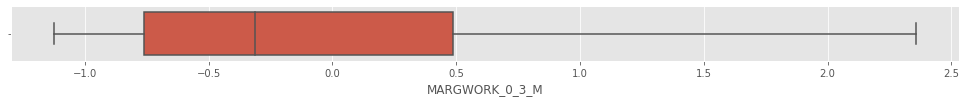

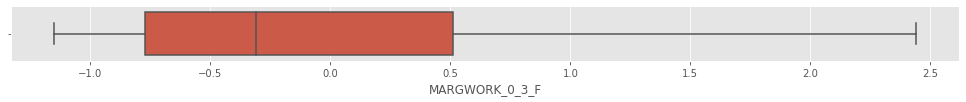

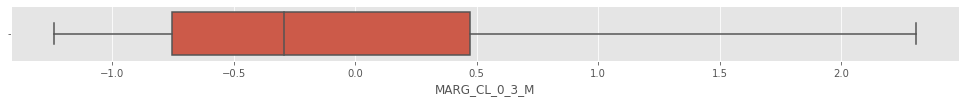

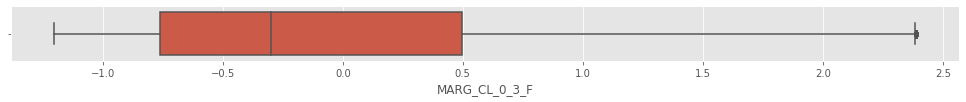

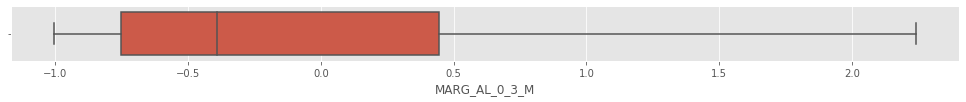

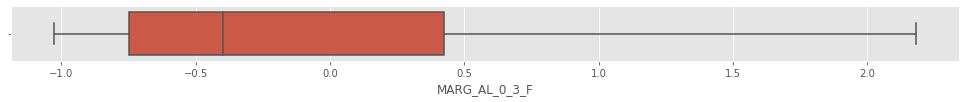

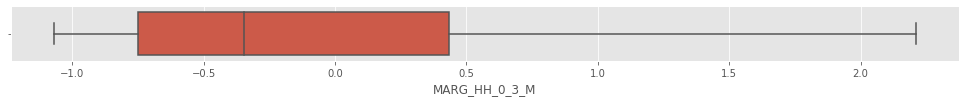

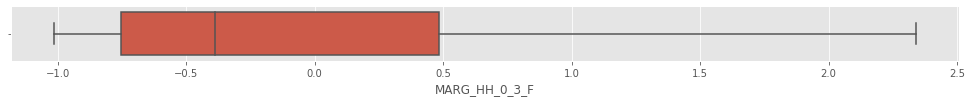

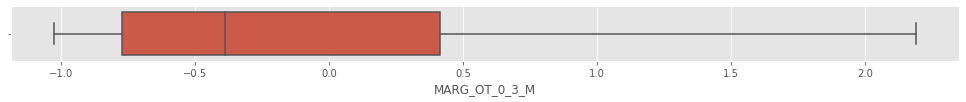

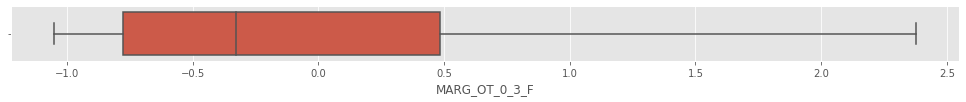

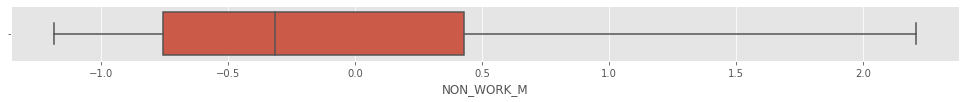

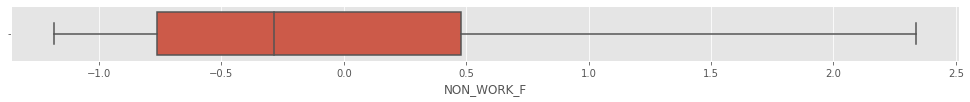

In [ ]:

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns)
df_scaled.describe()
X=df_scaled
Y=df_scaled

for column in df_scaled:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_scaled, x=column)

In [ ]:
pca2= PCA()
Y_new = pca2.fit_transform(Y)
print(pca2.explained_variance_ratio_)
exp_var = pca2.explained_variance_ratio_

[6.24441446e-01 1.33888289e-01 6.60229147e-02 4.86470891e-02
 3.34029704e-02 2.02297994e-02 1.73014629e-02 8.13866529e-03
 6.94892379e-03 5.64637229e-03 4.78562250e-03 4.12770833e-03
 3.17750294e-03 2.96454958e-03 2.42764517e-03 2.30351534e-03
 1.81837655e-03 1.67340548e-03 1.50392785e-03 1.41732362e-03
 1.15639919e-03 1.10493400e-03 8.45617224e-04 8.04891611e-04
 7.66778221e-04 5.59369722e-04 5.01311201e-04 4.82545623e-04
 4.10480504e-04 3.85881758e-04 3.28410688e-04 2.78520087e-04
 2.45156553e-04 2.08299401e-04 1.94666401e-04 1.59021779e-04
 1.27016642e-04 1.09865556e-04 8.68013375e-05 8.06925096e-05
 6.05897475e-05 3.82574118e-05 3.74001838e-05 3.36510796e-05
 2.51958296e-05 1.92626466e-05 1.69165450e-05 1.51102177e-05
 1.14143210e-05 1.01010143e-05 7.63350323e-06 6.48174183e-06
 5.37159674e-06 3.64086663e-06 2.42228792e-06 1.57128566e-06
 8.08813873e-07]


In [ ]:
# The PCA model implementation

pca = PCA(n_components=10)
X_new = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
exp_var = pca.explained_variance_ratio_

[0.62444145 0.13388829 0.06602291 0.04864709 0.03340297 0.0202298
 0.01730146 0.00813867 0.00694892 0.00564637]


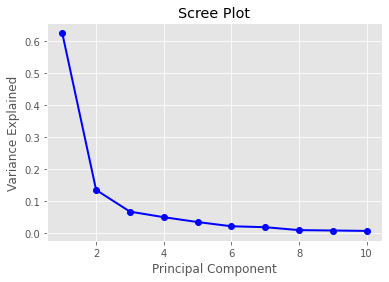

In [ ]:
#create scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.62444145 0.13388829 0.06602291 0.04864709 0.03340297 0.0202298
 0.01730146 0.00813867 0.00694892 0.00564637]


We can see that the first two features have the most variance here. Now we train the model.

Optimum no of components =5

In [ ]:
 #find the least number of components that can explain more than 90% variance
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  5


In [ ]:
pca = PCA(n_components=5)
X_new = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
exp_var = pca.explained_variance_ratio_

[0.62444145 0.13388829 0.06602291 0.04864709 0.03340297]


In [ ]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5']
data_pca = pd.DataFrame(np.round(pca.components_[:5,:],2),index=pc_comps,columns=df_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4,PC5
No_HH,0.15,-0.12,0.10,0.08,-0.01
TOT_M,0.16,-0.08,-0.04,0.05,-0.04
TOT_F,0.16,-0.09,0.03,0.07,-0.02
M_06,0.16,-0.02,-0.07,0.03,-0.08
F_06,0.16,-0.01,-0.07,0.02,-0.08
M_SC,0.14,-0.08,-0.04,0.01,-0.17
F_SC,0.14,-0.09,0.02,0.02,-0.16
M_ST,0.02,0.07,0.32,0.09,0.42
F_ST,0.02,0.07,0.34,0.08,0.42
M_LIT,0.16,-0.11,-0.03,0.09,-0.01


In [ ]:
def color_high(val):
    if val <= -0.20: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.15:
        return 'background: skyblue'  
data_pca.T.style.applymap(color_high)


,PC1,PC2,PC3,PC4,PC5
No_HH,0.150000,-0.120000,0.100000,0.080000,-0.010000
TOT_M,0.160000,-0.080000,-0.040000,0.050000,-0.040000
TOT_F,0.160000,-0.090000,0.030000,0.070000,-0.020000
M_06,0.160000,-0.020000,-0.070000,0.030000,-0.080000
F_06,0.160000,-0.010000,-0.070000,0.020000,-0.080000
M_SC,0.140000,-0.080000,-0.040000,0.010000,-0.170000
F_SC,0.140000,-0.090000,0.020000,0.020000,-0.160000
M_ST,0.020000,0.070000,0.320000,0.090000,0.420000
F_ST,0.020000,0.070000,0.340000,0.080000,0.420000
M_LIT,0.160000,-0.110000,-0.030000,0.090000,-0.010000


Linear expression of pc1

In [ ]:
print("Linear expression of PC1 :")
for i in range(0,57):
    print(" (",np.round(pca.components_[0][i],2),")",'*',df.columns[i], end=' + ')


Linear expression of PC1 :
 ( 0.15 ) * No_HH +  ( 0.16 ) * TOT_M +  ( 0.16 ) * TOT_F +  ( 0.16 ) * M_06 +  ( 0.16 ) * F_06 +  ( 0.14 ) * M_SC +  ( 0.14 ) * F_SC +  ( 0.02 ) * M_ST +  ( 0.02 ) * F_ST +  ( 0.16 ) * M_LIT +  ( 0.15 ) * F_LIT +  ( 0.15 ) * M_ILL +  ( 0.16 ) * F_ILL +  ( 0.15 ) * TOT_WORK_M +  ( 0.14 ) * TOT_WORK_F +  ( 0.14 ) * MAINWORK_M +  ( 0.13 ) * MAINWORK_F +  ( 0.11 ) * MAIN_CL_M +  ( 0.08 ) * MAIN_CL_F +  ( 0.12 ) * MAIN_AL_M +  ( 0.09 ) * MAIN_AL_F +  ( 0.14 ) * MAIN_HH_M +  ( 0.13 ) * MAIN_HH_F +  ( 0.12 ) * MAIN_OT_M +  ( 0.12 ) * MAIN_OT_F +  ( 0.16 ) * MARGWORK_M +  ( 0.15 ) * MARGWORK_F +  ( 0.09 ) * MARG_CL_M +  ( 0.07 ) * MARG_CL_F +  ( 0.13 ) * MARG_AL_M +  ( 0.12 ) * MARG_AL_F +  ( 0.15 ) * MARG_HH_M +  ( 0.14 ) * MARG_HH_F +  ( 0.15 ) * MARG_OT_M +  ( 0.15 ) * MARG_OT_F +  ( 0.16 ) * MARGWORK_3_6_M +  ( 0.16 ) * MARGWORK_3_6_F +  ( 0.16 ) * MARG_CL_3_6_M +  ( 0.15 ) * MARG_CL_3_6_F +  ( 0.09 ) * MARG_AL_3_6_M +  ( 0.07 ) * MARG_AL_3_6_F +  ( 0.13 ) * MAR

In [ ]:
print("Eigen Vectors",pca.components_)


Eigen Vectors [[ 0.14922158  0.15916917  0.15820921  0.15634043  0.1568144   0.14335015
   0.14353705  0.01884873  0.01787797  0.15515239  0.14544984  0.1545511
   0.15828347  0.15407627  0.14252995  0.14193201  0.12573163  0.11169244
   0.08303496  0.11929067  0.09008881  0.14184969  0.13388011  0.1227618
   0.1168656   0.15665637  0.14869489  0.08816344  0.06516026  0.1272781
   0.11588826  0.14536607  0.14230182  0.15087675  0.14801846  0.15790761
   0.15583101  0.15764021  0.1495015   0.0947852   0.06715842  0.12818439
   0.11395923  0.14510769  0.14102942  0.15092232  0.14753416  0.14298675
   0.13378373  0.06296394  0.05674058  0.11910165  0.11304417  0.14213963
   0.14136961  0.14762899  0.14210263]
 [-0.11548673 -0.08023879 -0.09371751 -0.02034061 -0.01431023 -0.07966701
  -0.08709832  0.06910144  0.06731586 -0.10598636 -0.13323356 -0.00945956
  -0.02179345 -0.12091195 -0.07600253 -0.16669997 -0.14224991  0.04255228
   0.09589258 -0.05334228 -0.07246688 -0.10183528 -0.11325661 

In [ ]:
print("Eigenn_Values " ,pca.explained_variance_)



Eigenn_Values  [35.64886379  7.64357559  3.76919551  2.77722349  1.90694892]


In [ ]:
X_new

array([[-5.52816148e+00,  4.30377559e-01, -1.47382695e+00,
        -1.27804898e+00,  3.76357634e-01],
       [-5.49201646e+00, -1.06110331e-01, -2.01564100e+00,
        -1.75016759e+00, -6.85688760e-03],
       [-7.47464297e+00, -2.17193764e-01, -2.47428211e-01,
         6.07916555e-03,  5.56282181e-01],
       ...,
       [-7.88626804e+00, -1.00353656e+00, -9.09284569e-01,
        -1.23800927e+00,  1.46031245e-01],
       [-7.86425952e+00, -9.99337996e-01, -8.51569237e-01,
        -7.82561039e-01, -8.16813902e-02],
       [-7.41622568e+00, -1.41214300e+00, -8.65921210e-01,
        -6.80528005e-01,  9.68605779e-02]])

We can also visualize the data in 2 dimensions using first two principal components¶

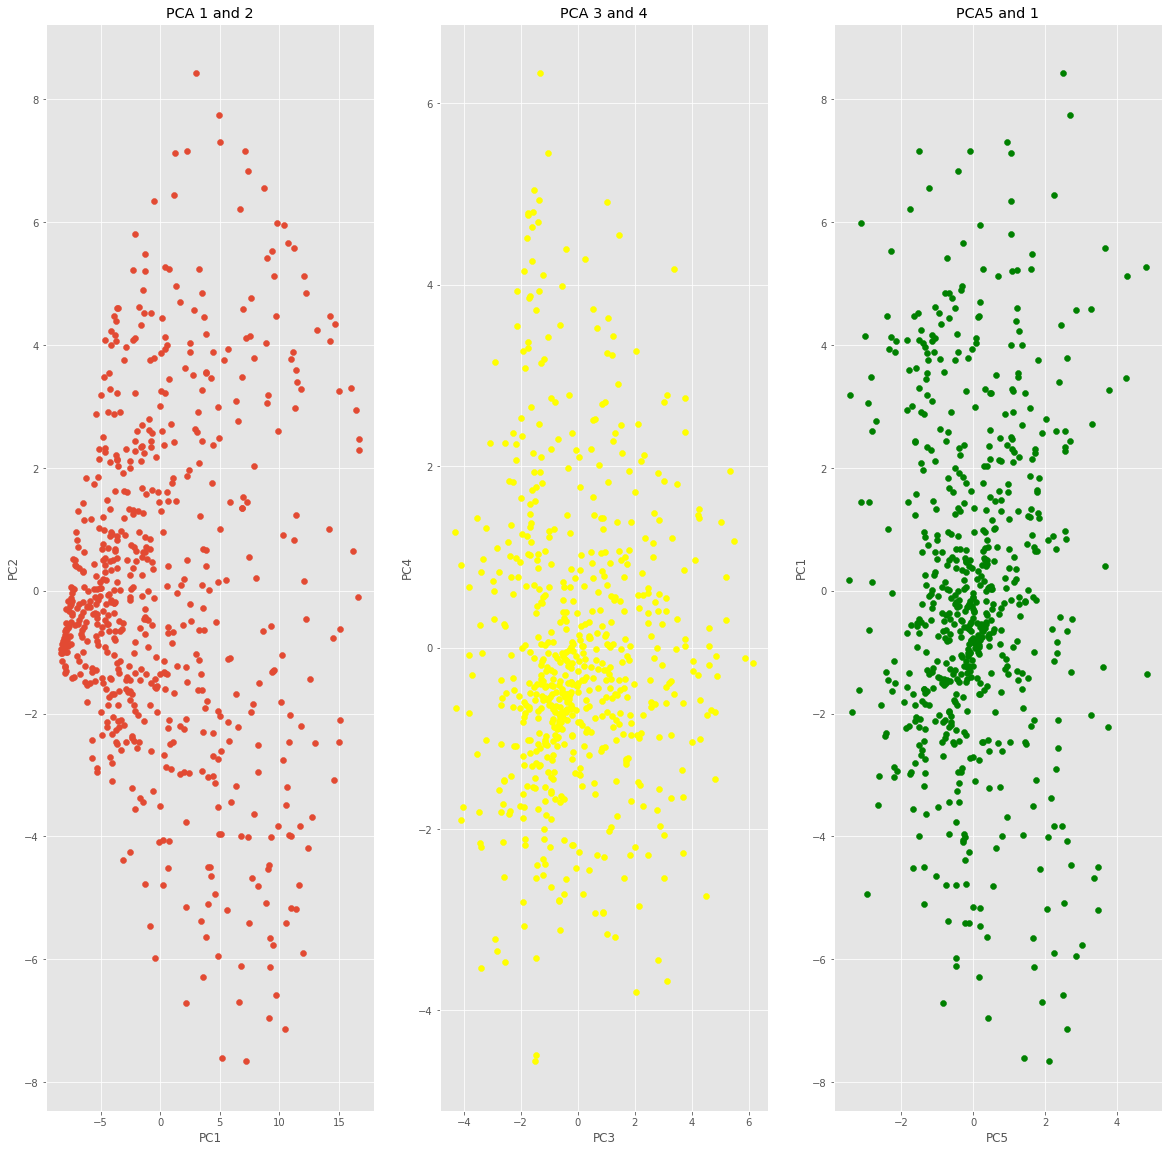

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,20))
print("AFTER PCA")
axes[0].scatter(X_new[:,0], X_new[:,1], cmap='orange')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('PCA 1 and 2')
axes[1].scatter(X_new[:,2], X_new[:,3], c="Yellow")
axes[1].set_xlabel('PC3')
axes[1].set_ylabel('PC4')
axes[1].set_title('PCA 3 and 4')
axes[2].scatter(X_new[:,4], X_new[:,1], c="green")
axes[2].set_xlabel('PC5')
axes[2].set_ylabel('PC1')
axes[2].set_title('PCA5 and 1')
plt.show()